# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

1. Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("datasets/athlete_events.csv")

df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notna())]

medailles_par_sport = df_2016['Sport'].value_counts().nlargest(5).reset_index()
medailles_par_sport.columns = ['Sport', 'Count']

fig = px.bar(medailles_par_sport,
             x='Sport',
             y='Count',
             labels={'Count': 'Nombre de médailles'},
             title='Top 5 des sports avec le plus de médailles en 2016')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


2. Filter the DataFrame to only include the rows corresponding to medal winners from 2016.

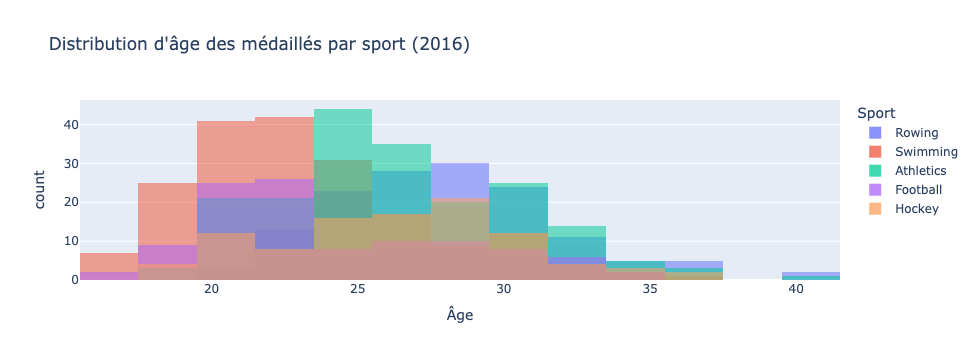

In [2]:
top5_sports = medailles_par_sport['Sport']
df_top = df_2016[df_2016['Sport'].isin(top5_sports)]
fig = px.histogram(df_top, x='Age', color='Sport', nbins=20, opacity=0.7, title='Distribution d\'âge des médaillés par sport (2016)', labels={'Age': 'Âge', 'count': 'Nombre de médaillés'})
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

3. Find out the medals awarded in 2016 for each sport.

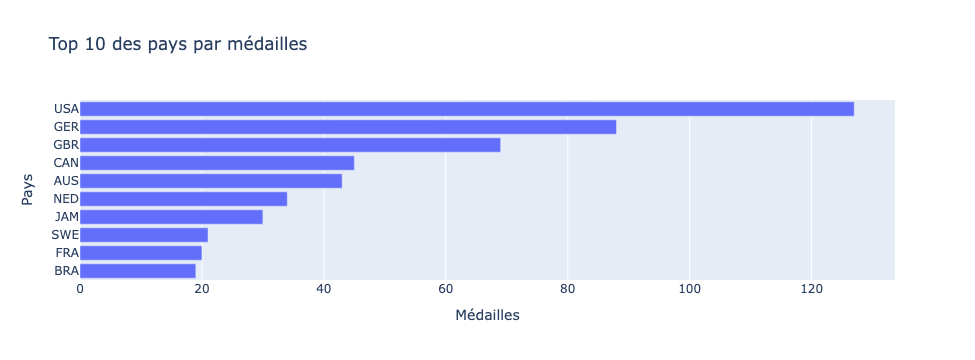

In [3]:
medailles_pays = df_top['NOC'].value_counts().nlargest(10).reset_index()
medailles_pays.columns = ['NOC', 'Count']

fig = px.bar(medailles_pays,
             x='Count',
             y='NOC',
             orientation='h',
             labels={'NOC': 'Pays', 'Count': 'Médailles'},
             title='Top 10 des pays par médailles')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

4. Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

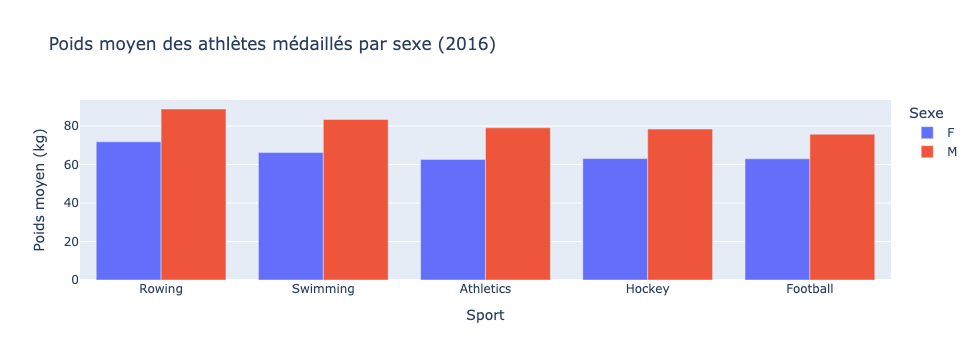

In [4]:
poids_moyen = df_top.groupby(['Sport', 'Sex'], as_index=False)['Weight'].mean()

fig = px.bar(poids_moyen,
             x='Sport',
             y='Weight',
             color='Sex',
             barmode='group',
             labels={'Weight': 'Poids moyen (kg)', 'Sex': 'Sexe'},
             title='Poids moyen des athlètes médaillés par sexe (2016)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()